# **AIRLINE PASSENGER (TIME-SERIES) PREDICTION USING LSTM**

I'm using LSTM deep learning model for this project. The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation through time and overcomes the vanishing gradient problem. LSTM can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results. Instead of neurons, LSTM networks have memory blocks that are connected through layers.

#### **Aim of the project:**

Given the number of passengers (in units of thousands) for last two months, what is the number of passengers next month? In order to solve this problem we will build a LSTM model and train this model with our train data which is first 100 months in our dataset. After the LSTM model training finishes and learn the pattern in time series train data.

# 1. Introduction to Time-Series Analysis

- A **time-series** data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals.  The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.


- **Time-Series Forecasting** is the process of using a statistical model to predict future values of a time-series based on past results.


- A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


- Applications of time series are used in statistics, finance, business applications, sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.

### **Components of a Time-Series**


- **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).


- **Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.


- **Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.


- **Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.


- **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

# 2. Types of Data

The time series analysis is the statistical analysis of the time series data. A time series data means that data is recorded at different time periods or intervals. The time series data may be of three types:

1) **Time series data** --> The observations of the values of a variable recorded at different points in time is called time series data. 

2) **Cross sectional data** --> It is the data of one or more variables recorded at the same point in time.

3) **Pooled data** --> It is the combination of time series data and cross sectional data.

# 3. Time Series Terminology

There are various terms and concepts in time series that we should know. These are as follows:

1) **Dependence**- It refers to the association of two observations of the same variable at prior time periods.

2) **Stationarity** --> It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

3) **Differencing** --> Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.

4) **Specification** --> It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models. 

5) **Exponential Smoothing** --> Exponential smoothing in time series analysis predicts the one next period value based on the past and current value. It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other. The exponential smoothing method is used to predict the short term prediction.

6) **Curve fitting** --> Curve fitting regression in time series analysis is used when data is in a non-linear relationship.

7) **ARIMA** --> ARIMA stands for Auto Regressive Integrated Moving Average.

# 4. Time Series Analysis

#### **4.1 Basic Set Up**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler 

#### **4.2 Import Data**

In [10]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


- **Rename the column names.**

In [11]:
df.columns= ['Month','Passengers']
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


- **My data fromat is Series, but I need 2D array for MinMaxScaler() and my other methods to work. So I will change to numpy array and reshape it.**

In [14]:
data=np.array(df).reshape(-1,1)

In [15]:
type(data)

numpy.ndarray

# 5. Visualize the Time Series

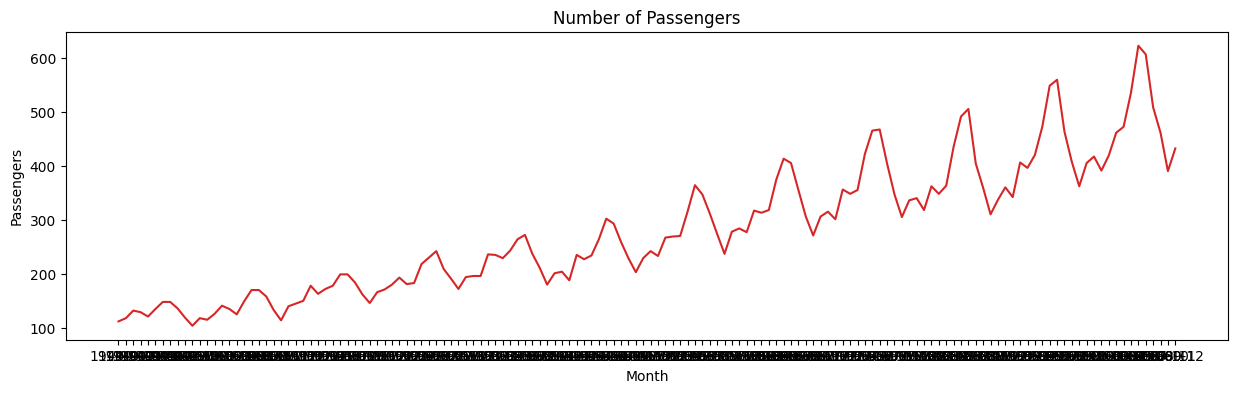

In [21]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df['Month'], y=df['Passengers'], title='Number of Passengers')

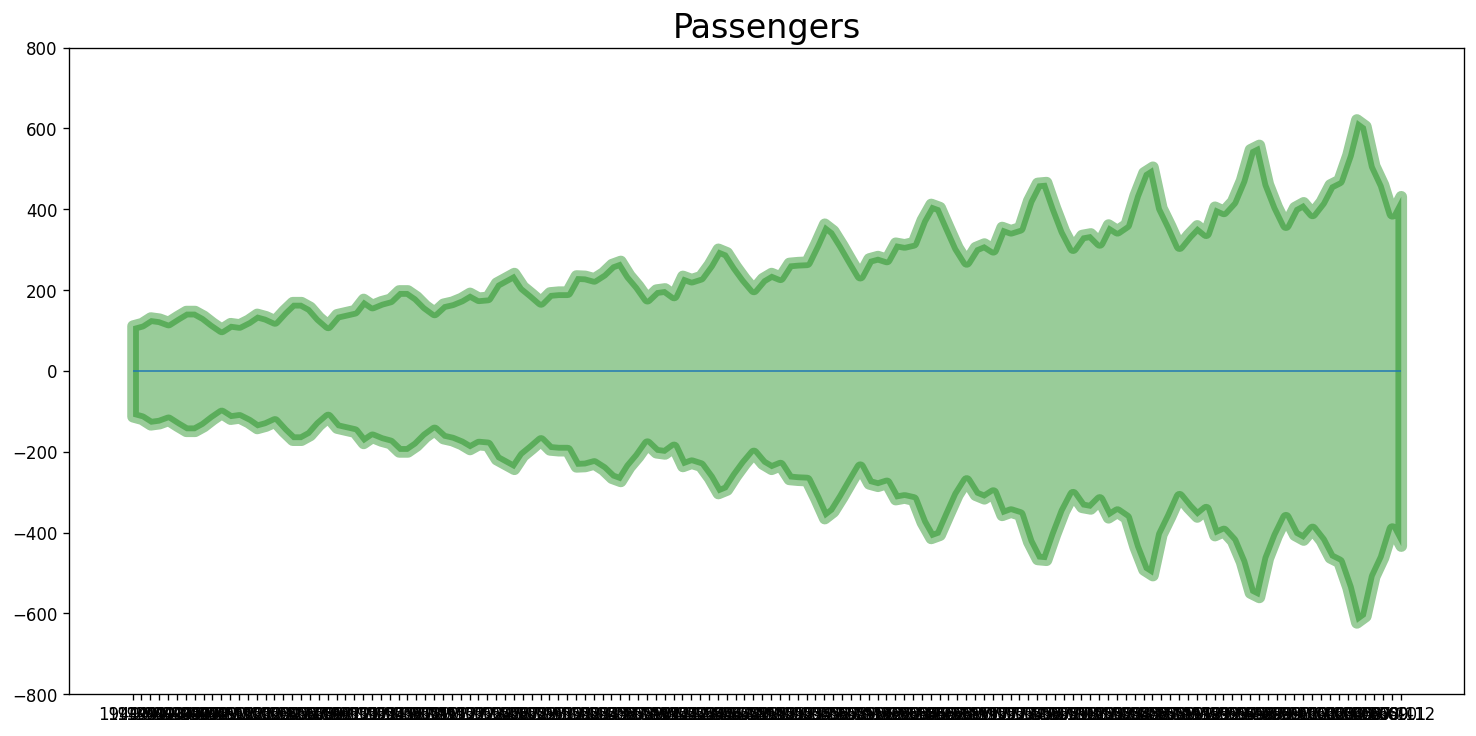

In [40]:
x = df['Month'].values
y1 = df['Passengers'].values

fig, ax = plt.subplots(1, 1, figsize=(15,7), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.4, linewidth=7, color='green')
plt.ylim(-800, 800)
plt.title('Passengers', fontsize=20)
plt.hlines(y=0, xmin=np.min(df['Month']), xmax=np.max(df['Month']), linewidth=.9)
plt.show()

# 6. Patterns in a Time Series

Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.

- **Trend** --> A **trend** is observed when there is an increasing or decreasing slope observed in the time series. 

- **Seasonality** -- > A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

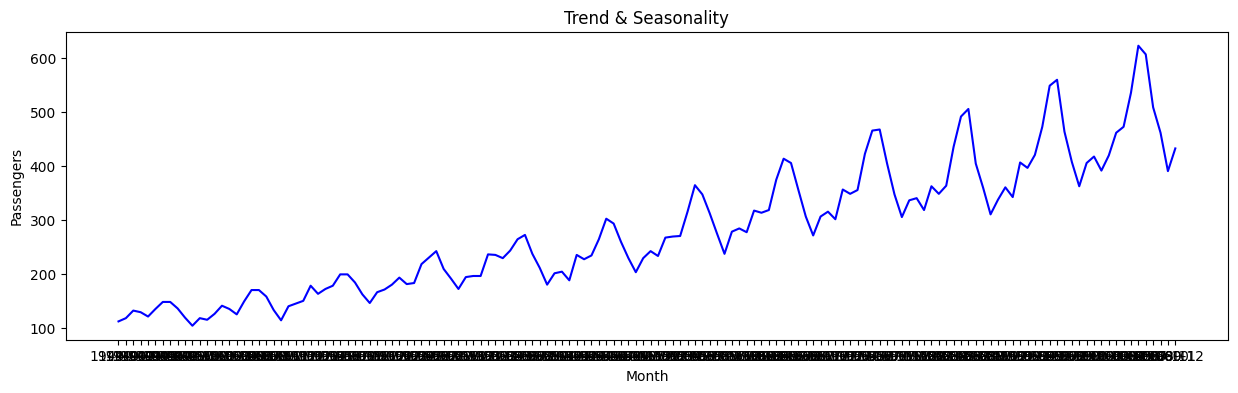

In [41]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df['Month'], y=df['Passengers'], title='Trend & Seasonality')

#### **Cyclic behaviour**

- Another important thing to consider is the **cyclic behaviour**. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

- If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

# 7. Additive and Multiplicative Time Series

We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.

#### **Additive time series:**

- Value = Base Level + Trend + Seasonality + Error

#### **Multiplicative Time Series:**

- Value = Base Level x Trend x Seasonality x Error

### Scaling..

LSTM is sensitive to the scale of the input data. So we will rescale the data to the range of 0-to-1, also called normalizing. 

In [9]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

### Train, Test split

In [10]:
len(data)

144

I have 144 data. I will use 100 of it as train set and 44 as test set..

In [11]:
train = data[0:100,:]
test = data[100:,:]

We will now define a function to prepare the train and test datasets for modeling. The function takes two arguments: the dataset, which is a NumPy array that we want to convert into a dataset, and the steps, which is the number of previous time steps to use as input variables to predict the next time period.



In [12]:
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

So using this "get_data" function I will prepare a dataset for modeling... Then I give this new prepared datset to my model for training...

In [13]:
steps = 2

#### Now I'm making my datasets for both training and testing..

Important: You must have numpy version 1.19 in your Anaconda environment for LSTM work. If you have a error like "NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array." you must change your numpy version to 1.19 using this commnad:

conda install numpy=1.19

In [14]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)

In [15]:
# Im reshaping my sets for using in LSTM model..
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [16]:
# I will use a Sequential model with 2 hidden layers
# Instead of neurons, LSTM networks have memory blocks that are connected through layers.
# The default sigmoid activation function is used for the LSTM blocks. 

model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))  # This is my first hidden layer with 128 memory blocks
model.add(Dense(64))                                  # This is my second hidden layer with 64 memory blocks
model.add(Dense(1))   # This is my output layer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


### Now it's time to train our model...

In [18]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 2/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0042- ETA: 0s - loss: 0.00
Epoch 3/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 4/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 5/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 6/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 7/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 8/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 9/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 10/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 11/25
97/97 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 12/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 13/25
97/97 [========

### Let's make prediction..

In [19]:
y_pred = model.predict(X_test)

We should rescale the prediction results, because our model gives us scaled predictions..

In [20]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

### Now plot the test set results... Remember our test set contains last 44 data in original dataset..

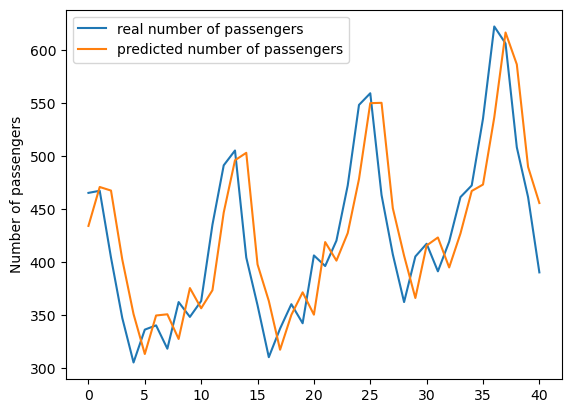

In [21]:
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()